In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()

In [ ]:
# load the dataset
data_orig = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')


In [ ]:
data_orig.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [ ]:
data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109316 entries, 0 to 109315
Data columns (total 62 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   iso_code                               109316 non-null  object 
 1   continent                              104260 non-null  object 
 2   location                               109316 non-null  object 
 3   date                                   109316 non-null  object 
 4   total_cases                            104624 non-null  float64
 5   new_cases                              104621 non-null  float64
 6   new_cases_smoothed                     103611 non-null  float64
 7   total_deaths                           94190 non-null   float64
 8   new_deaths                             94345 non-null   float64
 9   new_deaths_smoothed                    103611 non-null  float64
 10  total_cases_per_million                104070 non-null  

In [ ]:
data_orig.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,1.046240e+05,104621.000000,103611.000000,9.419000e+04,94345.000000,103611.000000,104070.000000,104067.000000,103062.000000,93649.000000,93804.000000,103062.000000,87962.000000,11812.000000,11812.000000,14194.000000,14194.000000,1037.000000,1037.000000,2010.000000,2010.000000,4.843000e+04,4.814200e+04,48142.000000,48430.000000,5.687600e+04,56876.000000,53215.000000,52583.000000,2.162800e+04,2.070300e+04,1.772300e+04,1.670000e+02,1.796300e+04,3.809900e+04,21628.000000,20703.000000,17723.000000,167.000000,38099.000000,90696.000000,1.085970e+05,101344.000000,97189.000000,96103.000000,96654.000000,97612.000000,65682.000000,97524.000000,100231.000000,76195.000000,75083.000000,48983.000000,88735.000000,103748.000000,97621.000000,3874.000000
mean,1.228519e+06,6241.063477,6238.002859,3.225933e+04,145.836165,131.883326,15201.133106,78.441037,78.416301,328.119088,1.537167,1.390296,1.009288,948.769048,23.896747,4230.670283,155.447159,239.518875,18.377656,2900.800650,90.743723,5.022474e+04,8.926626e+06,371.173695,2.266798,4.743480e+04,2.169619,0.087924,161.146211,4.755512e+07,2.546329e+07,1.473527e+07,1.566065e+05,7.773331e+05,3.707738e+05,33.441416,20.881165,14.599405,0.444551,3478.368514,57.730074,1.231040e+08,392.242095,30.543804,8.777416,5.555276,19282.172205,13.446801,258.854336,7.962344,10.583150,32.719494,50.785794,3.025723,73.250059,0.726944,18.202006
std,8.311770e+06,38464.912460,37990.684861,1.925453e+05,796.652626,742.030322,26966.198221,202.315792,159.282390,576.323555,3.943298,2.998445,0.351514,2716.628493,26.116071,11279.352089,202.110774,531.730570,33.538101,9709.822167,193.029944,1.821607e+05,3.855342e+07,894.935004,6.295624,1.641675e+05,5.386847,0.097153,876.033421,2.638819e+08,1.418713e+08,7.527864e+07,3.213334e+05,3.634195e+06,2.450274e+06,38.409640,21.770496,17.972757,1.590781,4595.099806,20.896753,6.753475e+08,1826.925906,9.128233,6.202273,4.230221,20034.251144,19.974922,119.174400,4.195027,10.485557,13.493850,31.756231,2.455845,7.552458,0.150297,35.407299
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3162.163000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.901036e+06,0.000000e+00,0.000000,-53.318000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.556000e+03,2.000000,8.143000,6.100000e+01,0.000000,0.000000,298.008000,0.247000,1.426000,9.064000,0.000000,0.000000,0.840000,29.000000,3.796500,107.000000,20.395000,6.915000,1.573000,36.000000,7.515250,1.7842

#Regression data visualization#

Median age vs total deaths per million

In [ ]:
# cleaning up the data
data_mod = data_orig.dropna(how='any', subset=['location', 'median_age', 'total_deaths_per_million'])
#check if there's any missing values
data_mod[['location', 'median_age', 'total_deaths_per_million']].isnull().any()

location                    False
median_age                  False
total_deaths_per_million    False
dtype: bool

In [ ]:
# grouping the total_values by country and assign mean total deaths and median age
med_age_subset = data_mod.groupby('location')[['median_age', 'total_deaths_per_million']].mean()
med_age_subset.head(10)

,median_age,total_deaths_per_million
location,,
Afghanistan,18.6,53.456353
Albania,38.0,375.207983
Algeria,29.1,49.550296
Angola,16.8,11.274956
Antigua and Barbuda,32.1,150.321291
Argentina,31.9,818.558620
Armenia,35.7,744.234810
Australia,37.9,24.969456
Austria,44.4,532.033429


In [ ]:
# setting variables
y = med_age_subset['total_deaths_per_million']
x1 = med_age_subset['median_age']

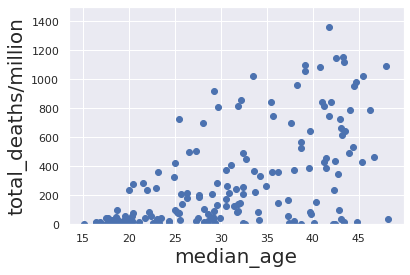

In [ ]:
# plot
plt.scatter(x1, y)
plt.ylabel('total_deaths/million', fontsize=20)
plt.xlabel('median_age', fontsize=20)
plt.ylim(0, 1500)
plt.show()

In [ ]:
# visualizing statistics too
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total_deaths_per_million   R-squared:                       0.255
Model:                                  OLS   Adj. R-squared:                  0.251
Method:                       Least Squares   F-statistic:                     61.04
Date:                      Sat, 14 Aug 2021   Prob (F-statistic):           4.67e-13
Time:                              20:47:36   Log-Likelihood:                -1300.0
No. Observations:                       180   AIC:                             2604.
Df Residuals:                           178   BIC:                             2610.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -353.9164     86.124     -4.109      0.000    -523.871    -183.962
median_age    21.2335      2.718      7.813      0.000      15.870      26.597
==============================================================================
Omnibus:                      153.711   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3309.806
Skew:                           2.961   Prob(JB):                         0.00
Kurtosis:                      23.155   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Regression Model##

median age vs total deaths/million

In [ ]:
#reshepaing the x values to 2D array for the ML model
x_matrix = x1.values.reshape(-1,1)

In [ ]:
#creating the simple linear regression model
median_age_model = LinearRegression()
median_age_model.fit(x_matrix, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# prediction
new_data = pd.DataFrame(data=[20, 30, 50], columns=['median_age'])
median_age_model.predict(new_data)

array([ 70.75283832, 283.08748183, 707.75676884])

In [ ]:
#R-square calculation
median_age_model.score(x_matrix, y)

0.25534733543590127